In [3]:
import pandas as pd
from sklearn.cross_validation import train_test_split
#can also use from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
dataset = pd.read_csv(r'C:\Users\vipul\Desktop\Udemy\Part 9 - Dimensionality Reduction\Section 43 - Principal Component Analysis (PCA)\wine.csv')

In [5]:
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [7]:
sc_x = StandardScaler()

In [8]:
x_train = sc_x.fit_transform(x_train)

In [9]:
x_test = sc_x.transform(x_test)

In [22]:
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[ 0.37281068  0.18739996  0.10801208  0.07619859  0.06261922  0.04896412
  0.0417445   0.02515945  0.02340805  0.0184892   0.01562956  0.01269224
  0.00687236]


In [44]:
#phla lene se 37% variance include ho jagea...doosra bhi include kr dia toh net variance 0.37 + 0.18 ho jaega..and so on...
#Now we need to choose kitne variable include krne hai..
#NOW RESTART KERNEL THN CHALAYA for n_components = 2 KE LIYE...COZ x-train got changed..
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [10]:
lda = LinearDiscriminantAnalysis(n_components = 2)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

In [11]:
x_train.shape

(133, 2)

In [12]:
reg = LogisticRegression(random_state = 0)

In [13]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = reg.predict(x_test)

In [15]:
cm = confusion_matrix(y_pred,y_test)

In [16]:
print(cm)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [53]:
x1,x2 = np.meshgrid(np.arange(start = x_train[:,0].min() - 1,stop = x_train[:,0].max() + 1,step = 0.01),
                    np.arange(start = x_train[:,1].min() - 1,stop = x_train[:,1].max() + 1,step = 0.01))
plt.contourf(x1,x2,reg.predict((np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha = 0.75,
                                     cmap = ListedColormap(('red','yellow','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train==j,0],x_train[y_train==j,1],c= ListedColormap(('red','yellow','green'))(i),label = j)

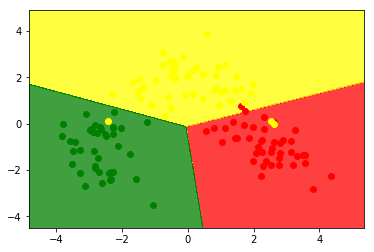

In [54]:
plt.show()